Домашнее задание №0
====



In [93]:
# Импортируем нужные нам библиотеки
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [94]:
# Загружаем датасет, с которым мы будем работать
df = pd.read_csv('../datatest/bike-sharing.csv')

In [95]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,0.2879,0.75,0.0,0,1,1


Задание
====

* Выбрать самостоятельно уровень агрегации (день, неделя, месяц, год), а так же функцию агрегации (среднее, сумма, максимум). 
* Построить базовую наивную модель





In [96]:
df = df[['dteday','cnt']]

In [97]:
df['dteday']=pd.to_datetime(df['dteday'])

In [98]:
df.set_index('dteday',inplace=True)

In [99]:
df=df.resample('W').mean()

<AxesSubplot:xlabel='dteday'>

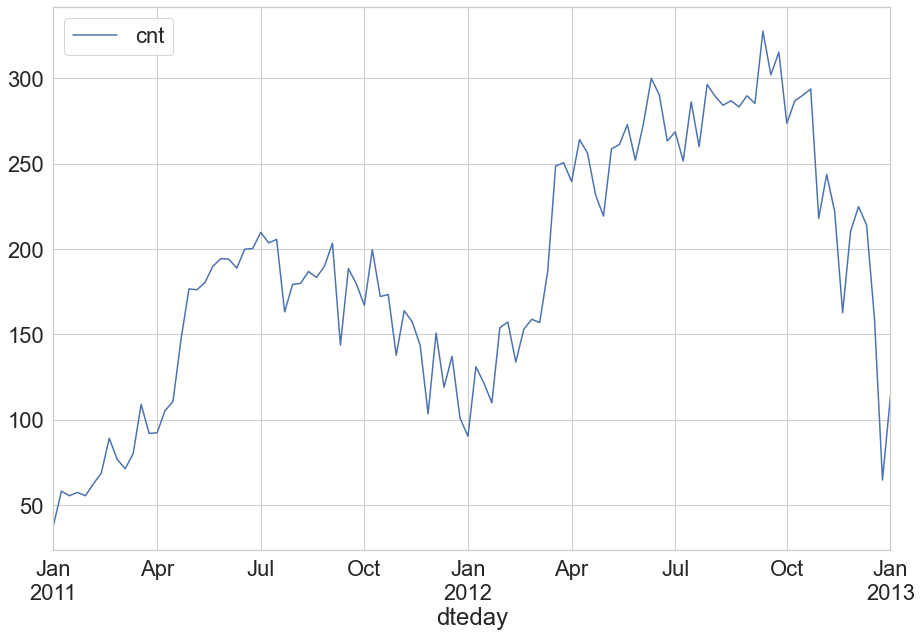

In [100]:
df.plot()

In [101]:
s = pd.Series(index = df.index,
              data= df['cnt'].values)

In [102]:
y_hat = list()
y_hat.append(np.nan)

In [103]:
for i in range(1,len(s)):
    y_hat.append(s.values[i-1])

In [104]:
s_hat = pd.Series(index=s.index,
                  data=y_hat)

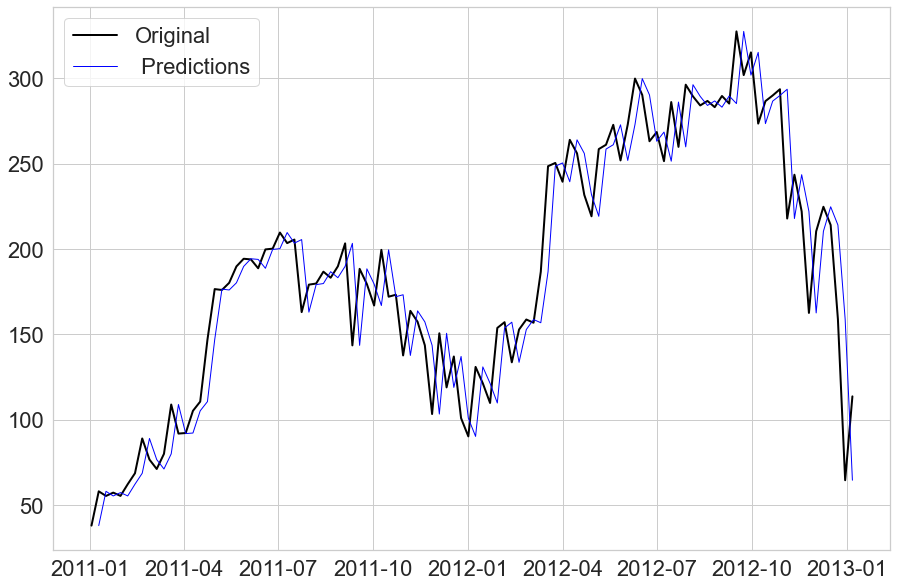

In [105]:
fig, ax = plt.subplots()
ax.plot(s, linewidth = 2, color='black',label = 'Original')
ax.plot(s_hat, linewidth = 1, color = 'blue', label =' Predictions')
ax.legend()
plt.show()

In [106]:
df['cnt_hat'] = s_hat
df.dropna(inplace=True)

In [107]:
print('MSE = ', mean_squared_error(df['cnt'],df['cnt_hat']))
print('MAE = ', mean_absolute_error(df['cnt'],df['cnt_hat']))
print('R2 = ', r2_score(df['cnt'],df['cnt_hat']))

MSE =  711.0153102376978
MAE =  19.555469639051964
R2 =  0.8632639809826389


In [108]:
df['residuals']= df['cnt']-df['cnt_hat']

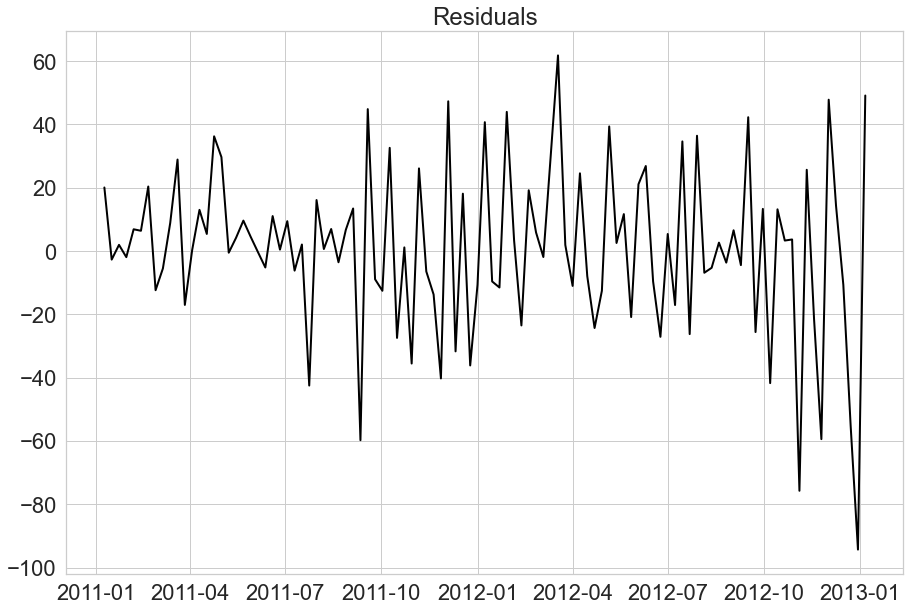

In [109]:
fig,ax = plt.subplots()

ax.plot(df['residuals'], linewidth=2,color='black')
ax.set_title('Residuals')
plt.show()

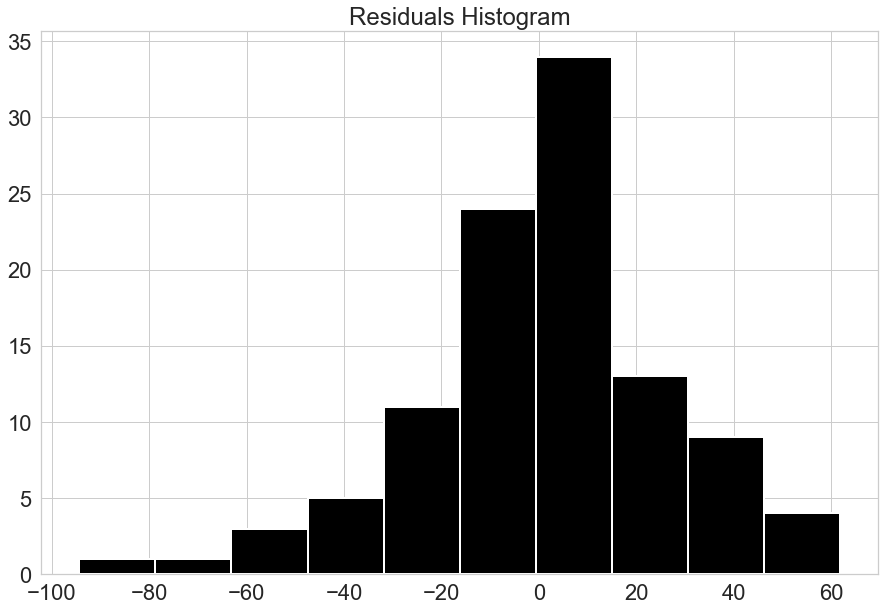

In [110]:
fig,ax = plt.subplots()

ax.hist(df['residuals'], linewidth=2,color='black')
ax.set_title('Residuals Histogram')
plt.show()

In [111]:
sigma = df['residuals'].std()

In [112]:
size = int(len(df)*0.9)
train,test = df[0:size],df[size:]

sigma = train['residuals'].std()

In [113]:
y_hat = train['cnt'].values[-1]
y_hat

289.98214285714283

In [114]:
lower_bound = list()
upper_bound = list()

for i in range(len(test)):
    sigma_hat = sigma*np.sqrt(i+1)
    lower_bound.append(y_hat-sigma_hat*1.96)
    upper_bound.append(y_hat + sigma_hat*1.96)
test.loc[:,'lower_bound'] = pd.Series(lower_bound, index=test.index)
test.loc[:,'upper_bound'] = upper_bound
test.loc[:,'yhat']=y_hat

/var/folders/np/4glrv8w909zc4b2ldzmzjb_m0000gn/T/ipykernel_77372/1379767299.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'lower_bound'] = pd.Series(lower_bound, index=test.index)
/var/folders/np/4glrv8w909zc4b2ldzmzjb_m0000gn/T/ipykernel_77372/1379767299.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'upper_bound'] = upper_bound
/var/folders/np/4glrv8w909zc4b2ldzmzjb_m0000gn/T/ipykernel_77372/1379767299.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy o

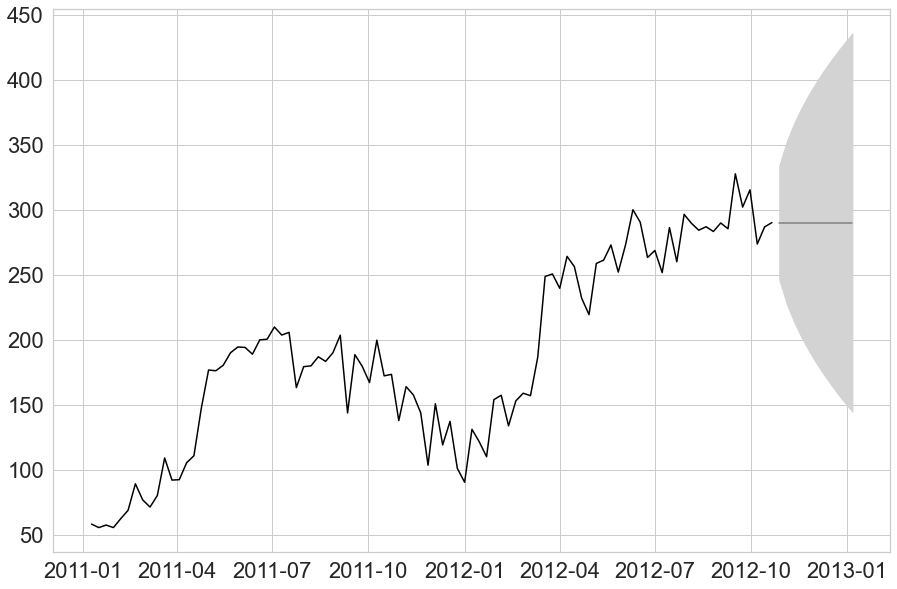

In [115]:
fig,ax = plt.subplots()
ax.plot(train['cnt'],color='black')
ax.plot(test['yhat'],color='grey')
ax.fill_between(test.index,test['upper_bound'],test['lower_bound'],color='lightgrey')
plt.show()